## 12.2 Assignment: Term Project

Madeleine Sharp, DSC530


## Project Topic: Colicky Horses

What is Colic?

Colic indicates a painful problem within a horse's abdomen. Because colic is often unpredictable and frequently unpreventable, it's a common concern for horse owners. Horses are naturally prone to colic, however, treatment and surgery can help (horses are physically unable to vomit, so any abdominal/digestive issue a horse experiences, such as colic, is great cause for concern and intervention). 

The most common types of colic are related to impaction, in which undigested feed or foreign bodies such as parasites block the movement of digesta through the intestines and cecum.

Research Questions:

1. What do the overall biomarkers look like for colicky horses (respiratory rate, pulse, etc.)?
2. What is the nature of the relationships between these biomarkers? Do any of the biomarkers impact a horse's life outcome more-so than others? 

Hypothesis:

One hypothesis I would like to consider/evaluate is:
1. I hypothesize that horses who received surgery for colic were less likely to die or be euthanized than those that did not receive colic surgery. 
    - I hypothesize that the relationship between surgery status and a horse's life outcome is a significant one.

#### Dataset:

The dataset I am using for the project is a flat-file source (.csv file) and the data can be obtained/accessed from the below places:
1. https://archive.ics.uci.edu/ml/datasets/Horse+Colic
2. https://www.kaggle.com/uciml/horse-colic?select=datadict.txt


##### Dataset description:
* This dataset consists of data from colicky horses. 

##### Variables:
* The original dataset includes a total of 28 variables.
* I will be using 11 of those variables for my project.

##### Variable descriptions:
* surgery: a variable that indicates whether a horse had colic surgery or not (categorical). 
    * 1 = no Surgery
    * 2 = surgery
* age: the age of the horse, split into two (2) categories.
    * 1 = young horse (< 6 months)
    * 2 = adult horse
* rectal_temp: the rectal temperature of the horse (in degrees Celsius). Normal is 37.8.
* pulse: the horse’s heart rate in beats per minute. Normal range (for adults) is 30-40 bpm.
* respiratory_rate: breaths per minute of a horse. Normal range is 8-10 breaths.
* mucous_membrane: color of these membranes indicates current circulation. Normal pink and bright pink indicate normal or slightly increased circulation.
* capillary_refill_time: another indicator of circulation. The longer the refill, the poorer the circulation.
    * 1 = less than 3 seconds
    * 2 = more than or equal to 3 seconds
* abdominal_distension: an important parameter/indicator for colic (since colic is an abdominal/digestive issue). No distension is healthy/normal.
    * 1 = none		
    * 2 = slight
    * 3 = moderate		
    * 4 = severe
* abdomen: the status of the horse's abdomen overall. A value of 3 is likely an obstruction caused by mechanical impaction. 4 and 5 indicate a surgical lesion.
    * 1 = normal		
    * 2 = other		
    * 3 = firm feces in the large intestine		
    * 4 = distended small intestine		
    * 5 = distended large intestine		
* packed_cell_volume: the number of red cells by volume in the blood, normal range is 30-50.
* outcome: the life outcome of the horse – did it live, die, or was it euthanized?

##### Additional background information on the dataset and some of the variables:
* A horse’s rectal temperature:
    * An elevated temp may occur due to infection.		
    * Temperature may be reduced when the animal is in late shock			
    * This parameter will usually change as the problem progresses		
* A horse’s pulse:
    * It is rare to have a lower-than-normal rate although athletic horses may have a rate of 20-25
    * Those with painful lesions or suffering from circulatory shock may have an elevated heart rate
* A horse’s mucous membrane:
    * 1 and 2 probably indicate a normal or slightly increased circulation (normal pink, bright pink)	
    * 3 may occur in early shock (pale pink)	
    * 4 and 6 are indicative of serious circulatory compromise (pale cyanotic, dark cyanotic)	
    * 5 is more indicative of a septicemia (bright red/injected)
* A horse’s abdominal distension: 
    * Abdominal distension is likely to be painful and have reduced gut motility		
    * A horse with severe abdominal distension is likely to require surgery just to relieve the pressure
* A horse’s packed cell volume: 
    * The level rises as the circulation becomes compromised or as the animal becomes dehydrated

In [1]:
## Import necessary libraries to use. 

import pandas as pd
import os
import numpy as np

In [2]:
## First, import the data and save it into a dataframe. 

horse_df = pd.read_csv(r"C:\Users\Madeleine's PC\Documents\Madeleine\Documents\Bellevue University Courses\Masters in DS\BU DSC530\Final Project + Milestones\Data\horse.csv")

In [3]:
## View the data as a dataframe.
horse_df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


As we can see above, the original dataset includes 28 variables. However, I will not utilize all of these variables, and will choose to focus on biomarkers that, based upon what the data dictionary describes the variables as and in my previous review of literature surrounding horses and colic, may be most pertinent.

#### Data cleaning/pre-work:

In order to use the data in the ways that I would like, some cleaning needs to take place. Please see my steps below for this data cleaning process.

In [4]:
## Drop the variables that I do not need.

horse_df = horse_df.drop(['hospital_number', 'temp_of_extremities', 'peripheral_pulse', 'pain', 'peristalsis', 
                         'nasogastric_tube', 'nasogastric_reflux','nasogastric_reflux_ph', 
                         'rectal_exam_feces','total_protein', 'abdomo_appearance', 'abdomo_protein', 'surgical_lesion', 'lesion_1', 
                         'lesion_2', 'lesion_3', 'cp_data'], axis = 'columns')

In [5]:
## View updated dataset.

horse_df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,mucous_membrane,capillary_refill_time,abdominal_distention,abdomen,packed_cell_volume,outcome
0,no,adult,38.5,66.0,28.0,NaN,more_3_sec,severe,distend_large,45.0,died
1,yes,adult,39.2,88.0,20.0,pale_cyanotic,less_3_sec,slight,other,50.0,euthanized
2,no,adult,38.3,40.0,24.0,pale_pink,less_3_sec,none,normal,33.0,lived
3,yes,young,39.1,164.0,84.0,dark_cyanotic,more_3_sec,severe,NaN,48.0,died
4,no,adult,37.3,104.0,35.0,dark_cyanotic,more_3_sec,NaN,NaN,74.0,died


In [6]:
## Check the data types.
horse_df.dtypes

surgery                   object
age                       object
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
mucous_membrane           object
capillary_refill_time     object
abdominal_distention      object
abdomen                   object
packed_cell_volume       float64
outcome                   object
dtype: object

In [7]:
## Check for any missing values and how many missing values there are.
## Ensure that missing values are being read as such.

## Check for nulls.
horse_df.isnull().values.any()

True

In [8]:
## Check which variables have the nulls.
horse_df.isnull().sum()

surgery                    0
age                        0
rectal_temp               60
pulse                     24
respiratory_rate          58
mucous_membrane           47
capillary_refill_time     32
abdominal_distention      56
abdomen                  118
packed_cell_volume        29
outcome                    0
dtype: int64

Because there are so many missing values, instead of removing all null values (which would cut-down on the data points available to me in this dataset), I am going to fill the missing values with a measure of central tendency that fits, depending on the kind of variable in question.
    
    * 30% of the values were missing from this dataset, which is significant. 
    * Rather than remove all values and severely cut down the data, I elected to fill missing values with a measure of central tendency:
        * Mean for numeric variables
        * Mode for categorical variables

In [9]:
## Handle the nulls - rectal_temp.
## Use to_numeric with errors = 'coerce' to fill strings with NaN.
horse_df['rectal_temp'] = horse_df['rectal_temp'].apply(pd.to_numeric, errors='coerce')

## Find mean of column.
mean_1 = horse_df['rectal_temp'].mean()
print(mean_1)

## Replace all NaNs with mean.
horse_df['rectal_temp'] = horse_df['rectal_temp'].fillna(mean_1)

38.16861924686195


In [10]:
## Handle the nulls - pulse.
## Use to_numeric with errors = 'coerce' to fill strings with NaN.
horse_df['pulse'] = horse_df['pulse'].apply(pd.to_numeric, errors='coerce')

## Find mean of column.
mean_2 = horse_df['pulse'].mean()
print(mean_2)

## Replace all NaNs with mean.
horse_df['pulse'] = horse_df['pulse'].fillna(mean_2)

72.0


In [11]:
## Handle the nulls - respiratory_rate.
## Use to_numeric with errors = 'coerce' to fill strings with NaN.
horse_df['respiratory_rate'] = horse_df['respiratory_rate'].apply(pd.to_numeric, errors='coerce')

## Find mean of column.
mean_3 = horse_df['respiratory_rate'].mean()
print(mean_3)

## Replace all NaNs with mean.
horse_df['respiratory_rate'] = horse_df['respiratory_rate'].fillna(mean_3)

30.46058091286307


In [12]:
## Handle the nulls - mucous_membrane.

## Find mode of column.
mode_1 = horse_df['mucous_membrane'].mode()[0]
print(mode_1)

## Replace all NaNs with mean.
horse_df['mucous_membrane'] = horse_df['mucous_membrane'].fillna(mode_1)

normal_pink


In [13]:
## Handle the nulls - capillary_refill_time.

## Find mode of column.
mode_2 = horse_df['capillary_refill_time'].mode()[0]
print(mode_2)

## Replace all NaNs with mean.
horse_df['capillary_refill_time'] = horse_df['capillary_refill_time'].fillna(mode_2)

less_3_sec


In [14]:
## Handle the nulls - abdominal_distention.

## Find mode of column.
mode_3 = horse_df['abdominal_distention'].mode()[0]
print(mode_3)

## Replace all NaNs with mode.
horse_df['abdominal_distention'] = horse_df['abdominal_distention'].fillna(mode_3)

none


In [15]:
## Handle the nulls - abdomen.

## Find mode of column.
mode_4 = horse_df['abdomen'].mode()[0]
print(mode_4)

## Replace all NaNs with mean.
horse_df['abdomen'] = horse_df['abdomen'].fillna(mode_4)

distend_large


In [16]:
## Handle the nulls - respiratory_rate.
## Use to_numeric with errors = 'coerce' to fill strings with NaN.
horse_df['packed_cell_volume'] = horse_df['packed_cell_volume'].apply(pd.to_numeric, errors='coerce')

## Find mean of column.
mean_4 = horse_df['packed_cell_volume'].mean()
print(mean_4)

## Replace all NaNs with mean.
horse_df['packed_cell_volume'] = horse_df['packed_cell_volume'].fillna(mean_4)

46.30740740740741


In [17]:
## View new dataframe.
horse_df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,mucous_membrane,capillary_refill_time,abdominal_distention,abdomen,packed_cell_volume,outcome
0,no,adult,38.5,66.0,28.0,normal_pink,more_3_sec,severe,distend_large,45.0,died
1,yes,adult,39.2,88.0,20.0,pale_cyanotic,less_3_sec,slight,other,50.0,euthanized
2,no,adult,38.3,40.0,24.0,pale_pink,less_3_sec,none,normal,33.0,lived
3,yes,young,39.1,164.0,84.0,dark_cyanotic,more_3_sec,severe,distend_large,48.0,died
4,no,adult,37.3,104.0,35.0,dark_cyanotic,more_3_sec,none,distend_large,74.0,died


In order to utilize some of the variables (categorical) that I want to in my project, I need to transform these variables so that they can be used in analyses and measures. 

To do this, I will ensure each categorical variable is appropriately labeled as such, and then I will ensure that each category within said variable will be assigned a corresponding numeric value (see data descriptions above, also, for what these values mean).

In [18]:
## Change all object variables to category.

for col in ['surgery', 'age', 'mucous_membrane', 'capillary_refill_time', 'abdominal_distention', 'abdomen', 'outcome']:
    horse_df[col] = horse_df[col].astype('category')

In [19]:
## Check data types.
horse_df.dtypes

surgery                  category
age                      category
rectal_temp               float64
pulse                     float64
respiratory_rate          float64
mucous_membrane          category
capillary_refill_time    category
abdominal_distention     category
abdomen                  category
packed_cell_volume        float64
outcome                  category
dtype: object

In [20]:
## Convert to/give categorical data a numeric value that can be more easily "read" for analysis.

## surgery
surgery = {'no': 1,'yes': 2}
horse_df['surgery'] = horse_df['surgery'].map(surgery)

## age
age = {'young': 1,'adult': 2}
horse_df['age'] = horse_df['age'].map(age)

## mucous_membrane
mucous = {'normal_pink': 1,'bright_pink': 2, 'pale_pink': 3, 'pale_cyanotic': 4, 'bright_red': 5, 'dark_cyanotic': 6}
horse_df['mucous_membrane'] = horse_df['mucous_membrane'].map(mucous)

## capillary_refill_time 
capillary = {'less_3_sec': 1,'more_3_sec': 2}
horse_df['capillary_refill_time'] = horse_df['capillary_refill_time'].map(capillary)

## abdominal_distension
abdominal = {'none': 1,'slight': 2, 'moderate': 3, 'severe': 4}
horse_df['abdominal_distention'] = horse_df['abdominal_distention'].map(abdominal)

## abdomen   
abdomen = {'normal': 1,'other': 2, 'firm': 3, 'distend_small': 4, 'distend_large': 5}
horse_df['abdomen'] = horse_df['abdomen'].map(abdomen)

## outcome   
outcome = {'lived': 1,'died': 2, 'euthanized': 3}
horse_df['outcome'] = horse_df['outcome'].map(outcome)


In [21]:
## View the data again after changes made.
horse_df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,mucous_membrane,capillary_refill_time,abdominal_distention,abdomen,packed_cell_volume,outcome
0,1,2,38.5,66.0,28.0,1,2.0,4,5,45.0,2
1,2,2,39.2,88.0,20.0,4,1.0,2,2,50.0,3
2,1,2,38.3,40.0,24.0,3,1.0,1,1,33.0,1
3,2,1,39.1,164.0,84.0,6,2.0,4,5,48.0,2
4,1,2,37.3,104.0,35.0,6,2.0,1,5,74.0,2


In [22]:
## Convert categories to a float, now that we have assigned "numeric" values.
for col in ['surgery', 'age', 'mucous_membrane', 'capillary_refill_time', 'abdominal_distention', 'abdomen', 'outcome']:
    horse_df[col] = horse_df[col].astype('float64')

### Step 1: Select a minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

### Step 2: Describe what the 5 variables mean in the dataset (Chapter 1).

For both Step 1 and 2, please see below section, as well as the previous dataset description section above (beginning of ths file).

#### Variables Used: 

The variables I used in my project come from my dataset and are also included in my dataset description prior to this section. To reiterate, these variables include:

* surgery: a variable that indicates whether a horse had colic surgery or not (categorical). 
    * 1 = no Surgery
    * 2 = surgery
* age: the age of the horse, split into two (2) categories.
    * 1 = young horse (< 6 months)
    * 2 = adult horse
* rectal_temp: the rectal temperature of the horse (in degrees Celsius). Normal is 37.8.
* pulse: the horse’s heart rate in beats per minute. Normal range (for adults) is 30-40 bpm.
* respiratory_rate: breaths per minute of a horse. Normal range is 8-10 breaths.
* mucous_membrane: color of these membranes indicates current circulation. Normal pink and bright pink indicate normal or slightly increased circulation.
* capillary_refill_time: another indicator of circulation. The longer the refill, the poorer the circulation.
    * 1 = less than 3 seconds
    * 2 = more than or equal to 3 seconds
* abdominal_distension: an important parameter/indicator for colic (since colic is an abdominal/digestive issue). No distension is healthy/normal.
    * 1 = none		
    * 2 = slight
    * 3 = moderate		
    * 4 = severe
* abdomen: the status of the horse's abdomen overall. A value of 3 is likely an obstruction caused by mechanical impaction. 4 and 5 indicate a surgical lesion.
    * 1 = normal		
    * 2 = other		
    * 3 = firm feces in the large intestine		
    * 4 = distended small intestine		
    * 5 = distended large intestine	
* packed_cell_volume: the number of red cells by volume in the blood, normal range is 30-50.
* outcome: the life outcome of the horse – did it live, die, or was it euthanized?

#### Project Impact:

Each of these variables will impact my project research questions because:
* These variables are biomarkers that give information about a horse's health, specifically those horses that have colic.
* Because colic is considered an illness, and when a living being is ill, biomarkers can be impacted by that and can be telling as to something being wrong with the living being (in this case, a horse).
* In addition to biomarker variables, I also have variables that indicate whether a horse has received colic surgery and their age - these are variables which may impact a horse's life outcome.
* Lastly, knowing the outcome variable alongside the other variables may grant insight into the potential relationships between surgery, age, biomarkers, and life outcome, etc.

### Step 3: Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

#### Variable Histograms:

In [23]:
## Create a histogram for each of the variables.
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

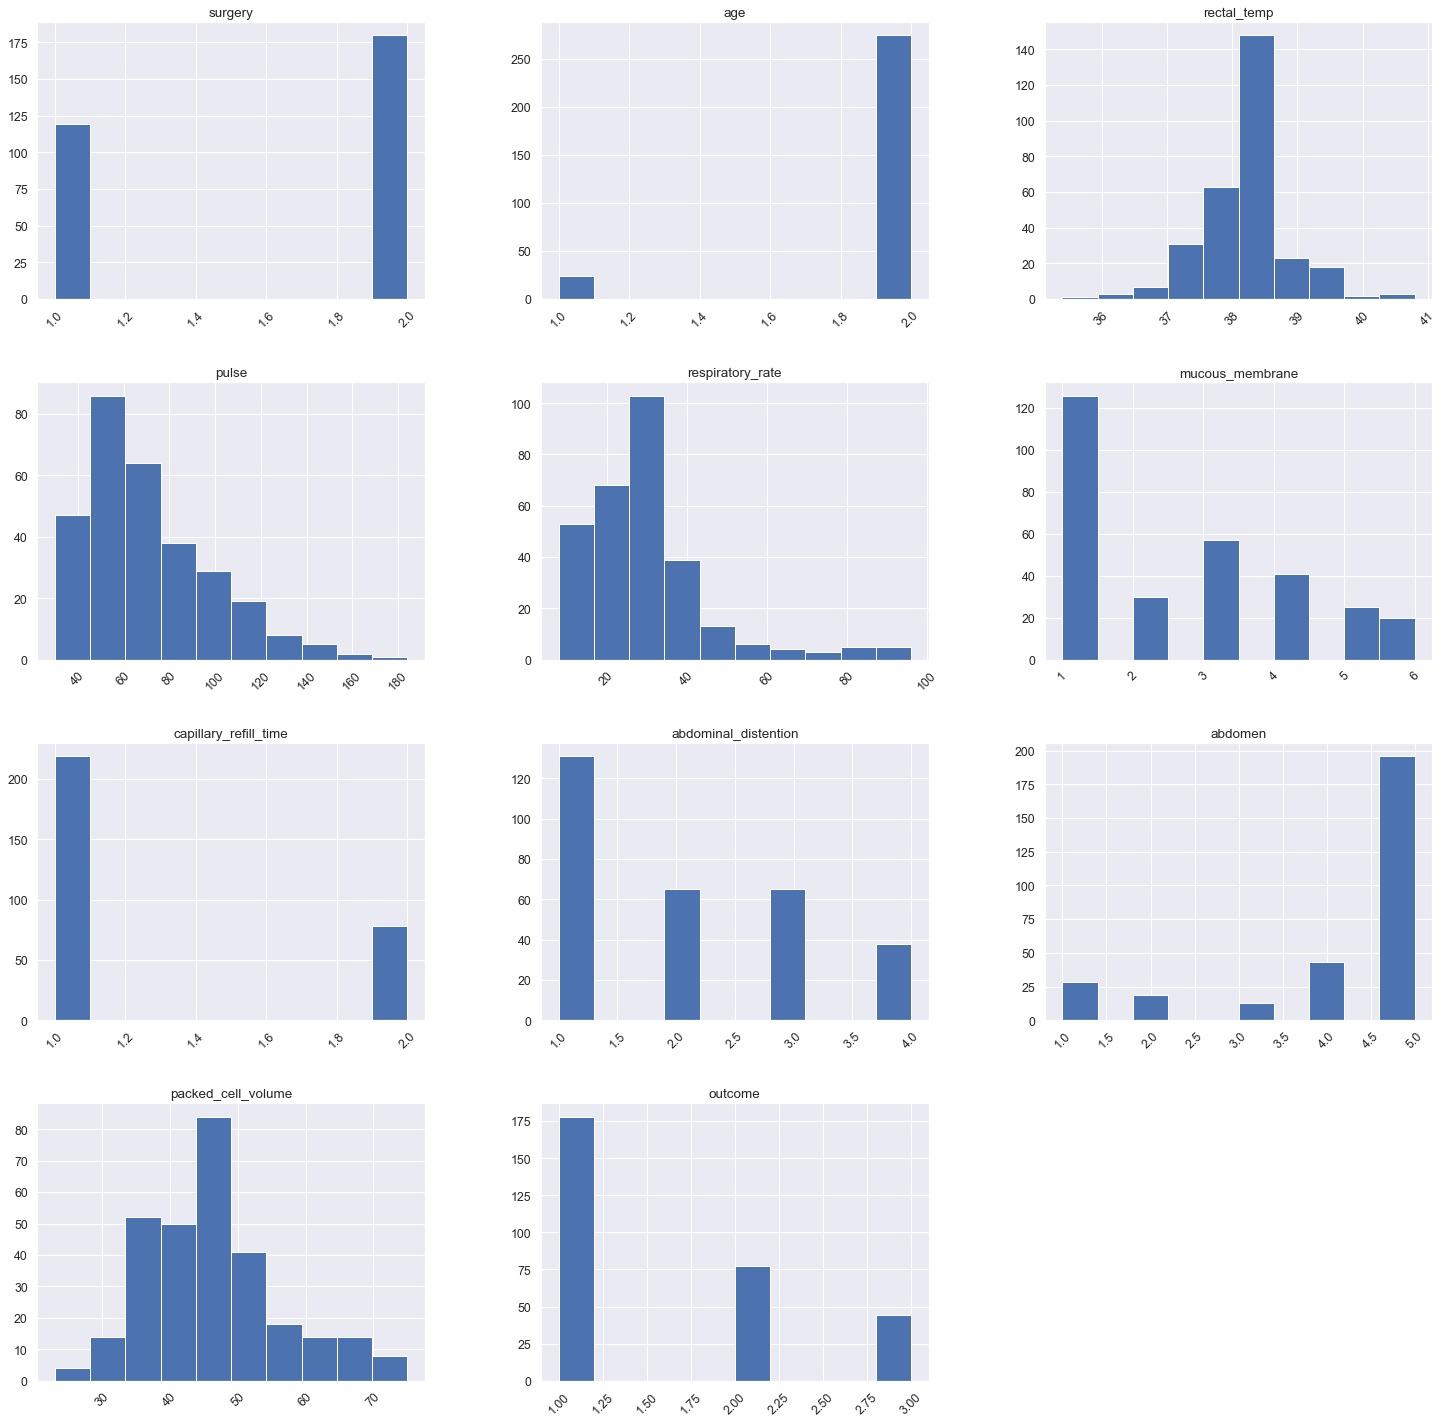

In [24]:
## Plotting histogram distributions for each of the numeric variables.

sns.set(font_scale=1.12)
horse_df.hist(figsize=(25,25), xrot=45)
plt.show()

#### Histogram Summary and Analysis:

* surgery:
    * For this variable, we can see that because it is a categorical variable, only two distribution options are present - either 1 (no surgery) or 2 (surgery). We can see that from the dataset, more horses did have surgery, and those that did not have surgery were about 3/4 or so of the amount of those that did.
    * I would not consider there to be any outliers here, given that the distribution between the two surgery options is pretty balanced.
* age:
    * Again, for this variable, we can see that because it is a categorical variable, only two distribution options are present - either 1 (young horse, less than 6 months old) or 2 (adult horse). We can see that from the dataset, drastically more adult horses are present within this data, with only about 25 young horses.
    * While we could consider young horses to be an outlier (they make up only about 10% of this dataset), it would be interesting to keep them just for comparative purposes - especially because only two age options exist rather than age ranges or brackets.
* rectal_temp:
    * Overall, we can see that rectal temperature follows a pretty normal distribution curve. It does not appear that any true outliers exist here. 
* pulse:
    * For pulse, there aren't really outliers either, but this distribution takes the shape of right-skewed (tails off to the right) distribution - so more of the pulse values are heavily concentrated at the beginning of the distribution.
* respiratory_rate:
    * This distribution is also quite right-skewed, with no noticeable outliers.
* mucous_membrane: 
    * For this variable, we can see that because it is a categorical variable, only six distribution options are present. We can see that from the dataset, most horses' mucous membranes were normal pink in color (considered healthy). 
    * No real outliers exist - we wouldn't want to eliminate any one category here.
* capillary_refill_time:
    * For this variable, we can see that because it is a categorical variable, only two distribution options are present - either 1 (less than 3 seconds) or 2 (more than or equal to 3 seconds). We can see that from the dataset, more horses had a capillary refill time of less than 3 seconds.
    * As for outliers, we could consider capillary refill time greater than or equal to three seconds to be an outlier, since it makes up a smaller portion of the horses, but because that would eliminate an entire category of data, it is likely best to keep it. (Although, it would be better if capillary refill time had been capture in the data as the exact number of seconds as an integer).
* abdominal_distension:
    * For this variable, we can see that because it is a categorical variable, only four distribution options are present. We can see that from the dataset, most horses' abdominal distension was that they had none - a healthy sign. 
    * No real outliers exist - we wouldn't want to eliminate any one category here.
* abdomen:
    * For this variable, we can see that because it is a categorical variable, only five distribution options are present. We can see that from the dataset, most horses had a distended large intestine.
    * This distribution is slightly left-skewed (tails off a bit towards the left).
    * No real outliers exist - we wouldn't want to eliminate any one category here.
* packed_cell_volume: 
    * Overall, we can see that packed cell volume follows a pretty normal distribution curve. It does not appear that any true outliers exist here. 
* outcome:
    * For this variable, we can see that because it is a categorical variable, only three distribution options are present. We can see that from the dataset, most horses ended up living.
    * No real outliers exist - we wouldn't want to eliminate any one category here.

Overall, my dataset did not include many of outliers. This may be because there were a predominant number of missing values, of which I have handled appropriately depending on the variable type. Overall, the data points for each of the variables chosen really did fall within range, and therefore are usable within that range - no need to remove anything since no prevalent outliers were truly present.

### Step 4: Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [25]:
## Descriptive statistics for entire dataset.
## Initial view, EDA.
horse_df.describe(include='all')

,surgery,age,rectal_temp,pulse,respiratory_rate,mucous_membrane,capillary_refill_time,abdominal_distention,abdomen,packed_cell_volume,outcome
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,297.000000,299.000000,299.000000,299.000000,299.000000
mean,1.602007,1.919732,38.168619,72.000000,30.460581,2.561873,1.262626,2.033445,4.204013,46.307407,1.551839
std,0.490305,0.272162,0.655730,27.468469,15.853977,1.636010,0.440804,1.080122,1.326745,9.915919,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000
25%,1.000000,2.000000,37.900000,48.500000,20.000000,1.000000,1.000000,1.000000,4.000000,39.000000,1.000000
50%,2.000000,2.000000,38.168619,68.000000,30.000000,2.000000,1.000000,2.000000,5.000000,46.000000,1.000000
75%,2.000000,2.000000,38.500000,88.000000,34.500000,4.000000,2.000000,3.000000,5.000000,50.000000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,6.000000,2.000000,4.000000,5.000000,75.000000,3.000000


The above table shows a summary of some basic descriptives of this dataset. In this, we can see:
* count: this is the number of instances (data points) in the dataset for each variable. Because missing values were handled, each variable has the same count number.
* mean: this is the average of the values for each of the variables. However, this can be somewhat misleading with certain variables, which is why further analyses will take place below in subsequent code steps.
* std: this is the standard deviation of each variable.
* min: this is the smallest value for each variable within the dataset.
* interquartile ranges (25%, 50%, 75%): this is a measure of statistical dispersion, or spread.
* max: this is the largest value for each variable within the dataset.

While this is an initial overview of descriptive characteristics of this dataset, it will be important to delve further into these variables. This is because, while the above shows means for each variable, for example, this is not actually helpful in the cases of those categorical variables that have simply been assigned numeric values for each category. For true numeric variables, I will keep the means, but for categorical variables, we will find the mode.

In [26]:
## Calculating the mean of all of the true numeric variables.
## Mean as a measure of central tendency really only applies to true numeric values.
## It does not apply to numeric values that are actually categorical (that will be mode).

horsedf_mean = horse_df[['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume']].mean()
horsedf_mean

rectal_temp           38.168619
pulse                 72.000000
respiratory_rate      30.460581
packed_cell_volume    46.307407
dtype: float64

The means for the true numeric variables include:

1. rectal_temp:            38.168619
2. pulse:                  72.000000
3. respiratory_rate:       30.460581
4. packed_cell_volume:     46.307407

In [27]:
## Calculating the mode of all of the true categorical variables.
## Mode as a measure of central tendency really applies appropriately to categorical variables.

horsedf_mode = horse_df[['surgery', 'age', 'mucous_membrane', 'capillary_refill_time', 'abdominal_distention', 'abdomen', 'outcome']].mode()
horsedf_mode

,surgery,age,mucous_membrane,capillary_refill_time,abdominal_distention,abdomen,outcome
0,2.0,2.0,1.0,1.0,1.0,5.0,1.0


The modes for the categorical variables include:

1. surgery: 2 (had surgery)
2. age: 2 (adult horse)
3. mucous_membrane: 1 (normal pink color)
4. capillary_refill_time: 1 (less than 3 seconds)
5. abdominal_distension:  1 (none/normal)
6. abdomen: 5 (distended large intestine)
7. outcome: 1 (the horse lived/survived)

In [28]:
## Calculating variance (spread) of all of the variables.

horsedf_variance = np.var(horse_df)
horsedf_variance

surgery                    0.239595
age                        0.073825
rectal_temp                0.428544
pulse                    751.993311
respiratory_rate         250.507945
mucous_membrane            2.667576
capillary_refill_time      0.193654
abdominal_distention       1.162761
abdomen                    1.754365
packed_cell_volume        97.996606
outcome                    0.541627
dtype: float64

The variance is a measure that is used to quantify the amount of variation of a set of data values from its mean. The variance values for each of the variables is outlined in the output above.

In [29]:
## Calculate tails for all variables.
## We can find this using kurtosis or skew.

import scipy
from scipy.stats import kurtosis
from scipy.stats import skew

In [30]:
## Kurtosis
horse_df.kurtosis()

surgery                 -1.836857
age                      7.693662
rectal_temp              2.827502
pulse                    1.038853
respiratory_rate         4.215156
mucous_membrane         -0.827900
capillary_refill_time   -0.829915
abdominal_distention    -1.082140
abdomen                  0.842936
packed_cell_volume       0.413293
outcome                 -0.559495
dtype: float64

In [31]:
## Skew
horse_df.skew()

surgery                 -0.418897
age                     -3.105196
rectal_temp              0.034235
pulse                    1.061156
respiratory_rate         1.820690
mucous_membrane          0.629940
capillary_refill_time    1.084306
abdominal_distention     0.544507
abdomen                 -1.516844
packed_cell_volume       0.731848
outcome                  0.933056
dtype: float64

Tails are the part of a distribution at the high and low extremes of the distribution. 

Two ways in which we can assess tails include kurtosis and skew. 

Kurtosis refers to one of the two measures that quantify shape of of a distribution and it describes the peakedness of the distribution. The kurtosis values for each of the variables are present above. To interpret kurtosis, the following can be adhered to:
   * For kurtosis, the general guideline is that if the number is greater than +1, the distribution is too peaked. 
   * Likewise, a kurtosis of less than –1 indicates a distribution that is too flat.

Obviously, for some of the categorical variables, kurtosis will not apply as well as for those variables that are truly numeric in nature. We can see this from the values above - for example, age comes in at 7.69 for its kurtosis - way too peaked, but recall that with age, only two categorical options were present (young or adult), so this makes sense, yet likely is not an accurate representation because of the kind of variable age is.

Skew refers to a measure of assymmetry or distortion of symmetric distribution.

For interpreting skewness, the rules of thumb are:
   * If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
   * If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
   * If the skewness is less than -1 or greater than 1, the data are highly skewed.
   * If the bulk of the data is at the left and the right tail is longer, we say that the distribution is skewed right or positively skewed.
   * If the peak is toward the right and the left tail is longer, we say that the distribution is skewed left or negatively skewed.
   
The skewedness of each of the variables is listed in the output above. Obviously, again, the distributions for the categorical variables are not going to be accurately represented or portrayed by this measure - this kind of measure is a best fit for true numeric variables.

Both kurtosis and skewedness can be seen from looking at and assessing the histograms as well - for the shape, peak, and tails of the distributions. Calculating the values of these measures just allows us to have a better, more accurate numerical picture of the true value of kurtosis and skew. 

### Step 5: Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

For my PMF, I am going to explore the surgery variable alongside the pulse variable. More specifically, the variable that I am going to "slice" like a filter will be the surgery variable. I am going to compare those horses that had colic surgery to those that did not have colic surgery. 

Within this, I am going to compare, in particular, the pulses of those horses that had surgery versus the pulses of those horses that did not undergo surgery.

I would like to explore/assess the pulse distributions of each of these groups.

In [32]:
## Import packages.
import thinkstats2
import thinkplot
import matplotlib
import matplotlib.pyplot as plt

In [33]:
## Assign surgery value/variable.
surgery = horse_df.surgery
surgery

0      1.0
1      2.0
2      1.0
3      2.0
4      1.0
      ... 
294    2.0
295    1.0
296    2.0
297    2.0
298    2.0
Name: surgery, Length: 299, dtype: float64

In [34]:
## Assign pulse value/variable.
pulse = horse_df.pulse
pulse

0       66.0
1       88.0
2       40.0
3      164.0
4      104.0
       ...  
294    120.0
295     72.0
296     72.0
297    100.0
298     40.0
Name: pulse, Length: 299, dtype: float64

In [35]:
## Create surgery 1 group.
surgery_1 = horse_df[horse_df.surgery == 1]

In [36]:
## Create surgery 2 group.
surgery_2 = horse_df[horse_df.surgery == 2]

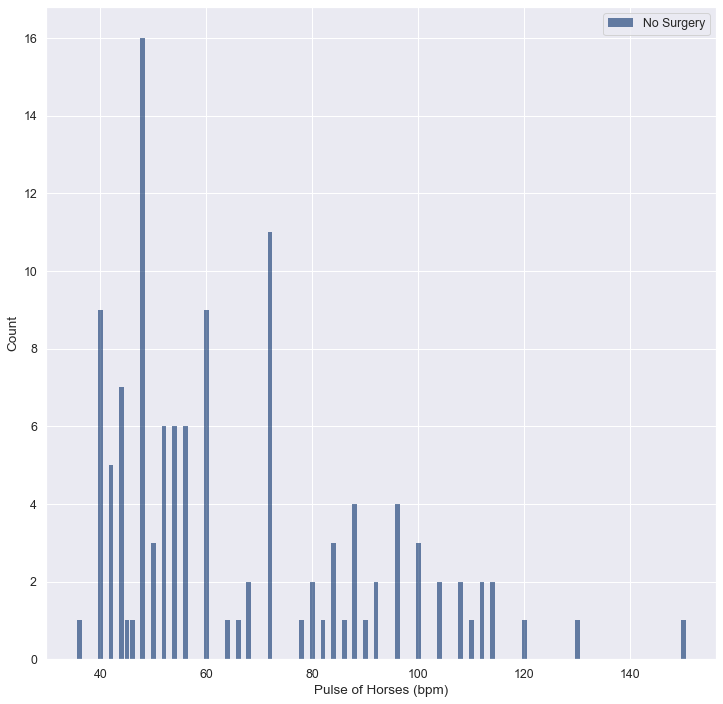

In [37]:
## Plot surgery 1 plot first.
matplotlib.rc('figure', figsize=(12, 12))
nosurgery_hist = thinkstats2.Hist(surgery_1.pulse, label='No Surgery')
thinkplot.Hist(nosurgery_hist)
plt.legend()
thinkplot.Config(xlabel='Pulse of Horses (bpm)', ylabel='Count')

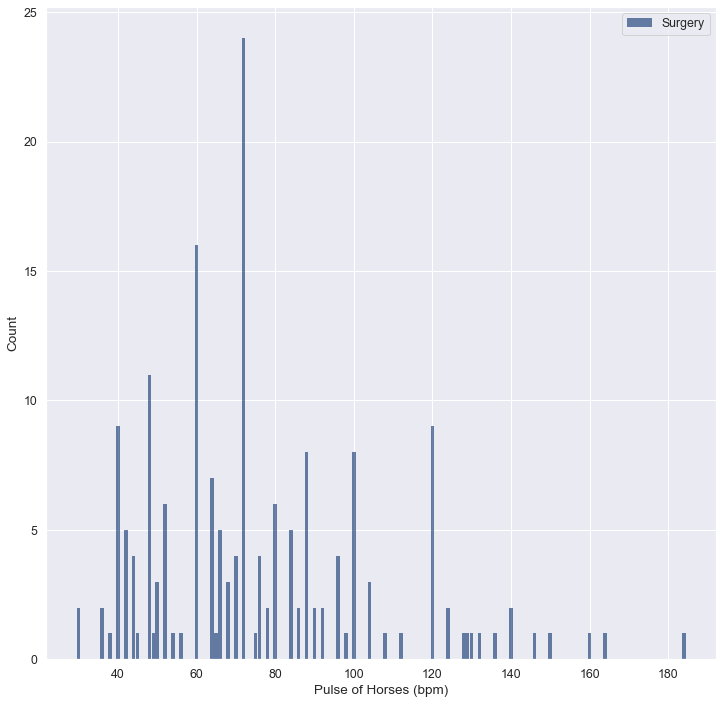

In [38]:
## Plot surgery 2 next.
surgery_hist = thinkstats2.Hist(surgery_2.pulse, label='Surgery')
thinkplot.Hist(surgery_hist)
plt.legend()
thinkplot.Config(xlabel='Pulse of Horses (bpm)', ylabel='Count')

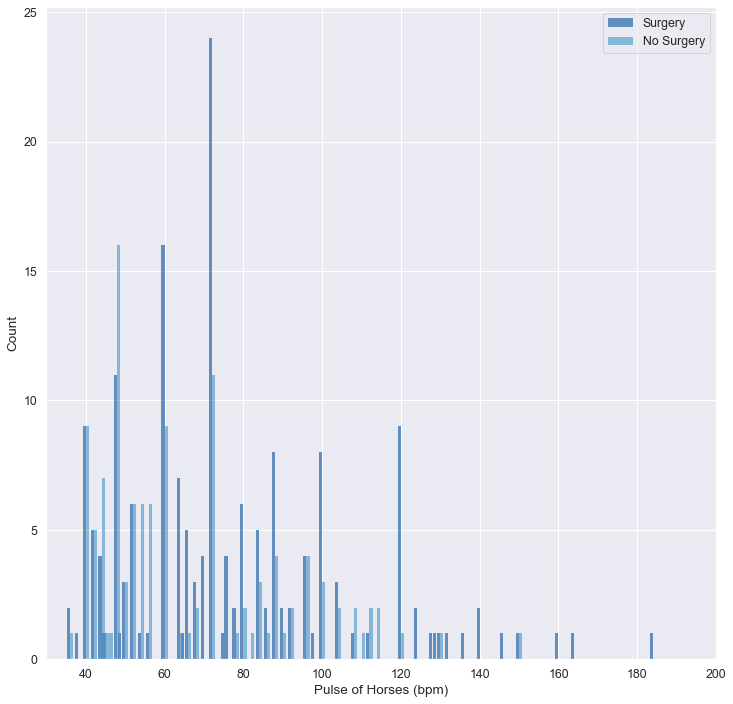

In [39]:
## Plot together.
width = .8
thinkplot.PrePlot(2)
thinkplot.Hist(surgery_hist, align='right', width=width)
thinkplot.Hist(nosurgery_hist, align='left', width=width)
plt.legend()
thinkplot.Config(xlabel='Pulse of Horses (bpm)', ylabel='Count', xlim=[30, 200])

In [40]:
## PMFs.

nosurgery_pmf = thinkstats2.Pmf(surgery_1.pulse, label='Did Not Receive Surgery')
surgery_pmf = thinkstats2.Pmf(surgery_2.pulse, label='Received Surgery')

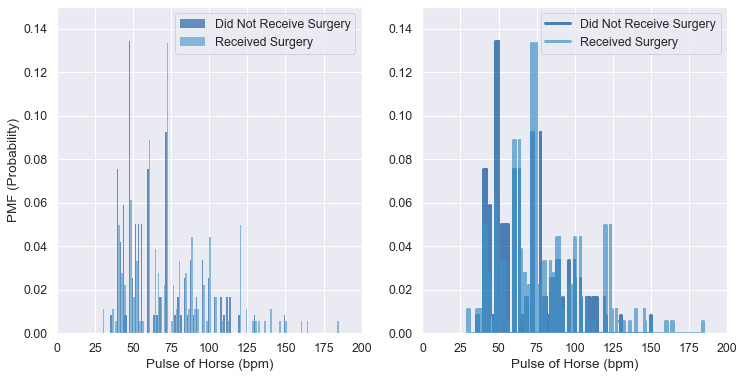

In [41]:
## Plot PMF.

width=1
axis = [0, 200, 0, 0.15]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(nosurgery_pmf, align='right', width=width)
thinkplot.Hist(surgery_pmf, align='left', width=width)
plt.legend(fontsize=12)
thinkplot.Config(xlabel='Pulse of Horse (bpm)', ylabel='PMF (Probability)', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([nosurgery_pmf, surgery_pmf], width=width)
plt.legend(fontsize=12)
thinkplot.Config(xlabel='Pulse of Horse (bpm)', axis=axis)

PMFs are useful because they allow us to compare the two distributions of this data without being misled by the difference in sample size. These measures map from each value to its probability. 

The left figure shows the PMFs as a histogram, the right shows a step feature.
Based on these figures, we can ascertain that those horses that did not receive colic surgery tend to have lower pulses overall (per the dark blue concentrations between about 40 bpm and 100 bpm) than those that did receive surgery (the light blue concentrated more between about 60 bpm and 140 bpm).

This may perhaps indicate to us that the horses with higher pulses were deemed to be better candidates to receive surgery, given their pulses were higher, and thus a higher pulse could indicate systemic distress that warranted intervention. 

### Step 6: Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

For creating a CDF, I am going to use the variable abdominal distension. I would like to explore the percentile ranks of the status of a horse's abdominal distension. This variable can tend to be quite important when assessing a colicky horse. 

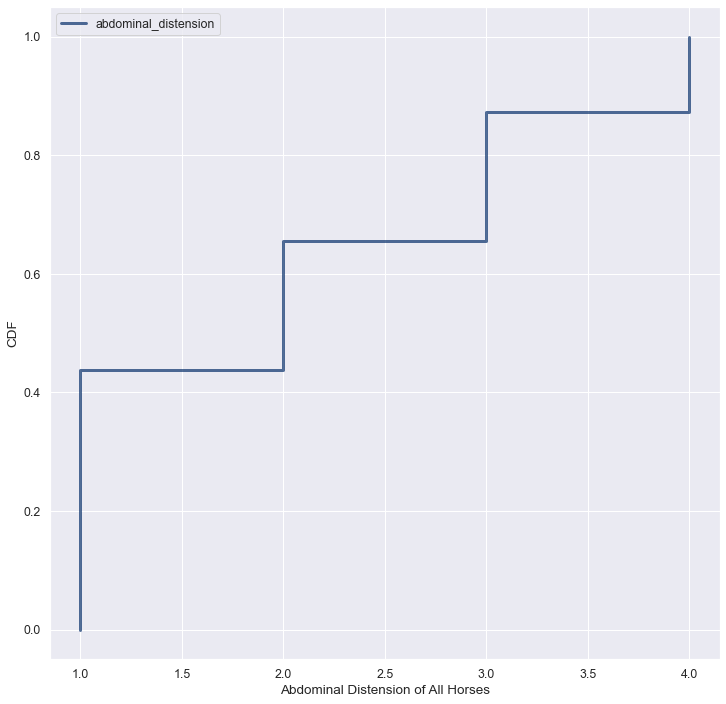

In [42]:
## CDF for abdominal_distension.
## An important variable for consideration with respect to surgery outcomes.

## List of values.
sample = horse_df.abdominal_distention

##Define CDF function.
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

## Samples of data.
## abdominal_dist_sample = horse_df.abdominal_distention
## abdominal_dist = horse_df[horse_df.abdominal_distention]
## surgery = horse_df[horse_df.surgery]

## Plot the CDF for all horses (no surgery and surgery).
cdf = thinkstats2.Cdf(sample, label='abdominal_distension')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Abdominal Distension of All Horses', ylabel='CDF', loc='upper left')

CDFs are useful because they are a function that maps from a value to its percentile rank, which is helpful for knowing which percentile a certain value falls within. 

In my specific example above with abdominal distension, we can see that:
   * The abdominal distension group for 1 (none) is in the 45th percentile, approximately.
   * The group for 2 (slight) is in the 65th percentile, approximately. 
   * The group for 3 (moderate) is in the 85th percentile, approximately/
   * Finally, the group for 4 (severe) is in the 100th percentile.
   
Overall, this means that most of the horses did not have severe abdominal distension, in fact, the combined groups of horses that had no, slight, and moderate distension makes up approximately 85% of the dataset.

### Step 7: Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

For the analytical distribution, I will be plotting a Normal (Gaussian) Distribution of horse respiratory rates. This will show me the overall curve of the distribution of colicky horse's respiration. I will also complete a Normal Distribution using the CDF for this variable.

In [43]:
respiration = horse_df.respiratory_rate

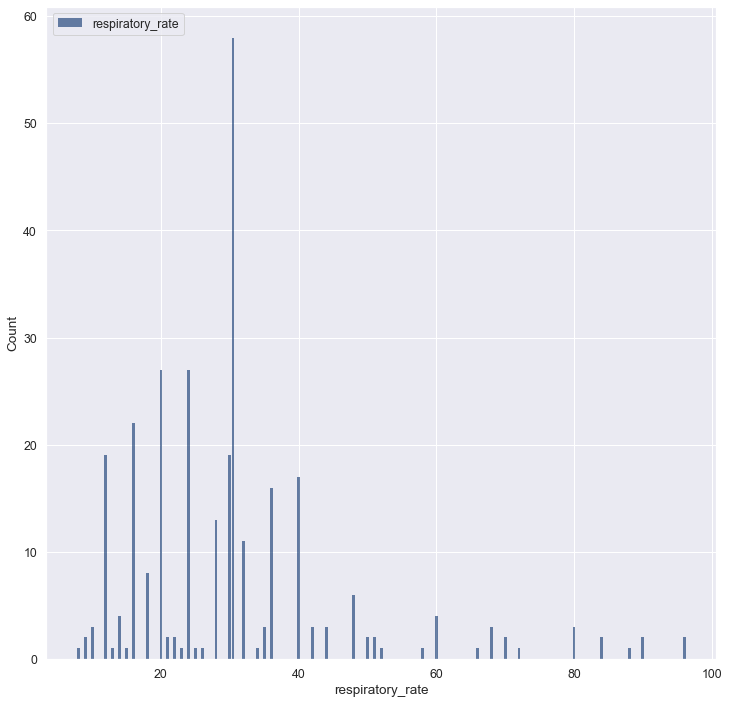

In [44]:
## Normal distribution of respiratory_rate.

hist = thinkstats2.Hist(respiration, label='respiratory_rate')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='respiratory_rate', ylabel='Count')

Mean, Var 30.165131162529008 221.424609045206
Sigma 14.880343041919632


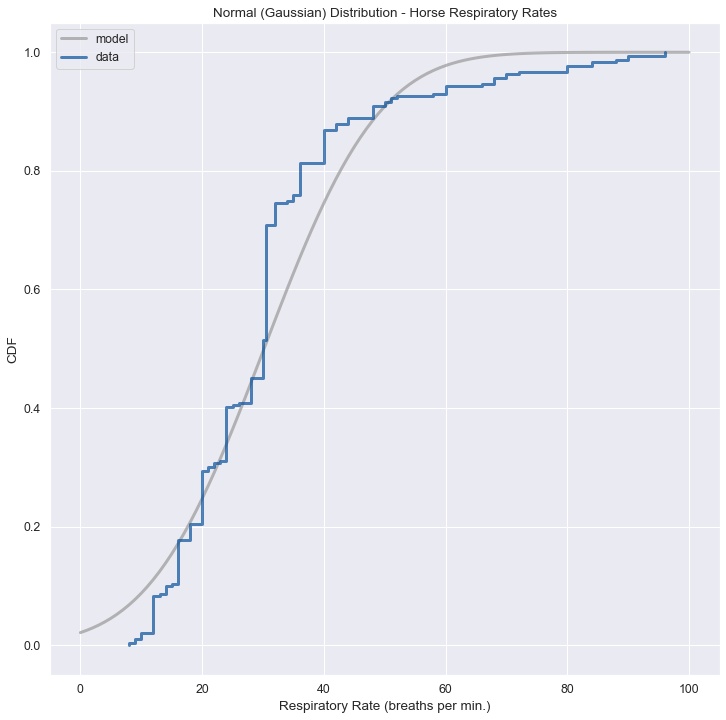

In [45]:
## Normal distribution for respiratory_rate with CDF.

## Estimate parameters: trimming outliers yields a better fit.
mu, var = thinkstats2.TrimmedMeanVar(respiration, p=0.01)
print('Mean, Var', mu, var)
    
## Plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=100)

thinkplot.Plot(xs, ps, label='model', color='0.6')

## Plot the data
cdf = thinkstats2.Cdf(respiration, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Normal (Gaussian) Distribution - Horse Respiratory Rates',
                 xlabel='Respiratory Rate (breaths per min.)',
                 ylabel='CDF')

In the main normal distribution, we can see what we were able to see in the histogram EDA towards the beginning of this file.

In the distribution with CDF, we can see that while the model overall seems to follow the curve of the actual data, there are a few places in which there is a discrepancy and it falls out of line. These places are:
   * Below the 20th percentile of the data. 
   * Between the 55th and 90th percentiles (it briefly touches right at the 90th percentile).
   * And finally, from the 90th percentile to the 100th (also briefly touches on the 100th percentile).
   
From this, we can also see that the actual data values do not produce the straightest line - lots of jaggedness in that line there. This also merely means that the normal model may not be the best fit for this data.

### Step 8: Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

The first two variables that I will compare in my first scatterplot are pulse and respiratory_rate.

The next two variables that I would like to assess in my second scatterplot are pulse and packed_cell_volume.

In [46]:
## Define the two variables to be used.

pulse = horse_df.pulse
respiration = horse_df.respiratory_rate
packed_cell = horse_df.packed_cell_volume

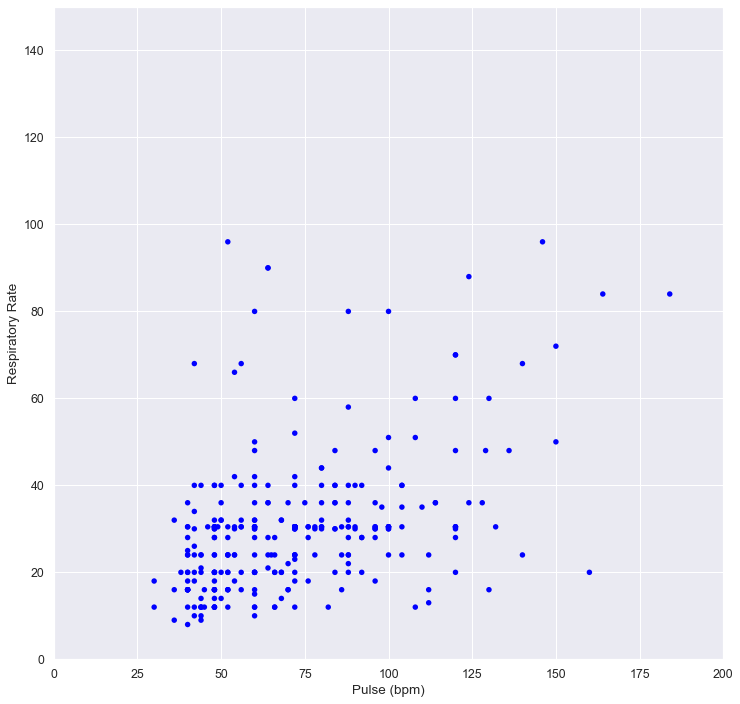

In [47]:
## Plot the first scatter plot.

thinkplot.Scatter(pulse, respiration, alpha=1)
thinkplot.Config(xlabel='Pulse (bpm)',
                 ylabel='Respiratory Rate',
                 axis=[0, 200, 0, 150],
                 legend=False)

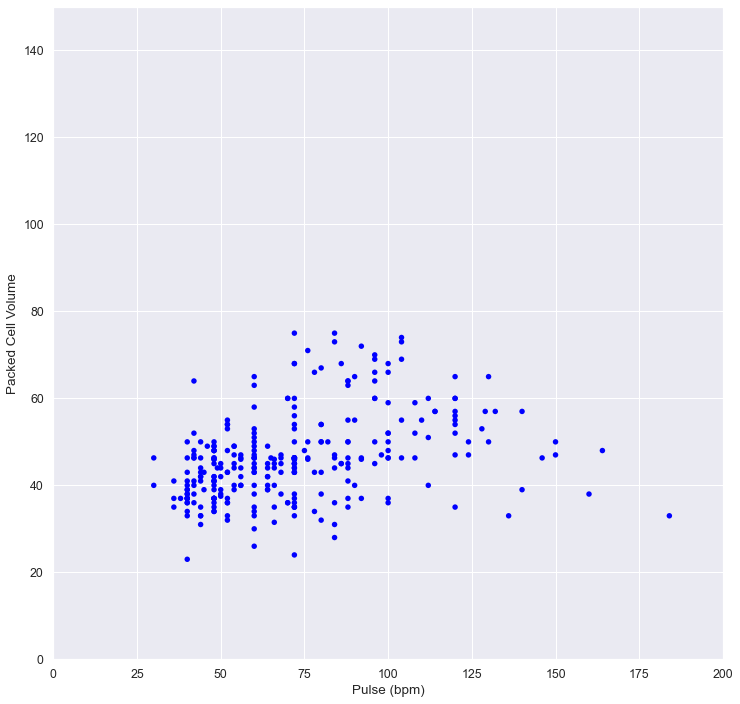

In [48]:
## Second scatterplot.

thinkplot.Scatter(pulse, packed_cell, alpha=1)
thinkplot.Config(xlabel='Pulse (bpm)',
                 ylabel='Packed Cell Volume',
                 axis=[0, 200, 0, 150],
                 legend=False)

In [49]:
## Calculate covariance.
np.cov(horse_df.pulse, horse_df.respiratory_rate)

array([[754.51677852, 191.53681528],
       [191.53681528, 251.34857557]])

In [50]:
## Calculate covariance.
np.cov(horse_df.pulse, horse_df.packed_cell_volume)

array([[754.51677852, 100.73801889],
       [100.73801889,  98.32545364]])

The nature of the relationships between the variables in the scatterplots:

* For the first scatterplot, we can ascertain that it looks like a linear relationship - the scatterplot follows a "line" from the bottom left of the graph up towards the top right.
* For the second scatterplot, we see that is follows no real line, and rather almost has sort of a curve that dips downward on the right side. This scatterplot has the characteristics of a more non-linear relationship.

In addition to the scatterplots for looking at relationships, I wanted to complete a correlation heatmap to get a look at the relationships between all of the variables, since that is a part of my research question. This style of heatmap portrays the Pearson's correlation coefficient value for/between all of the variables - it grants a nice overview of the relationships between the features of the entire dataset.

Text(0.5, 1.0, 'Correlation Matrix of Horse Colic Dataset Variables')

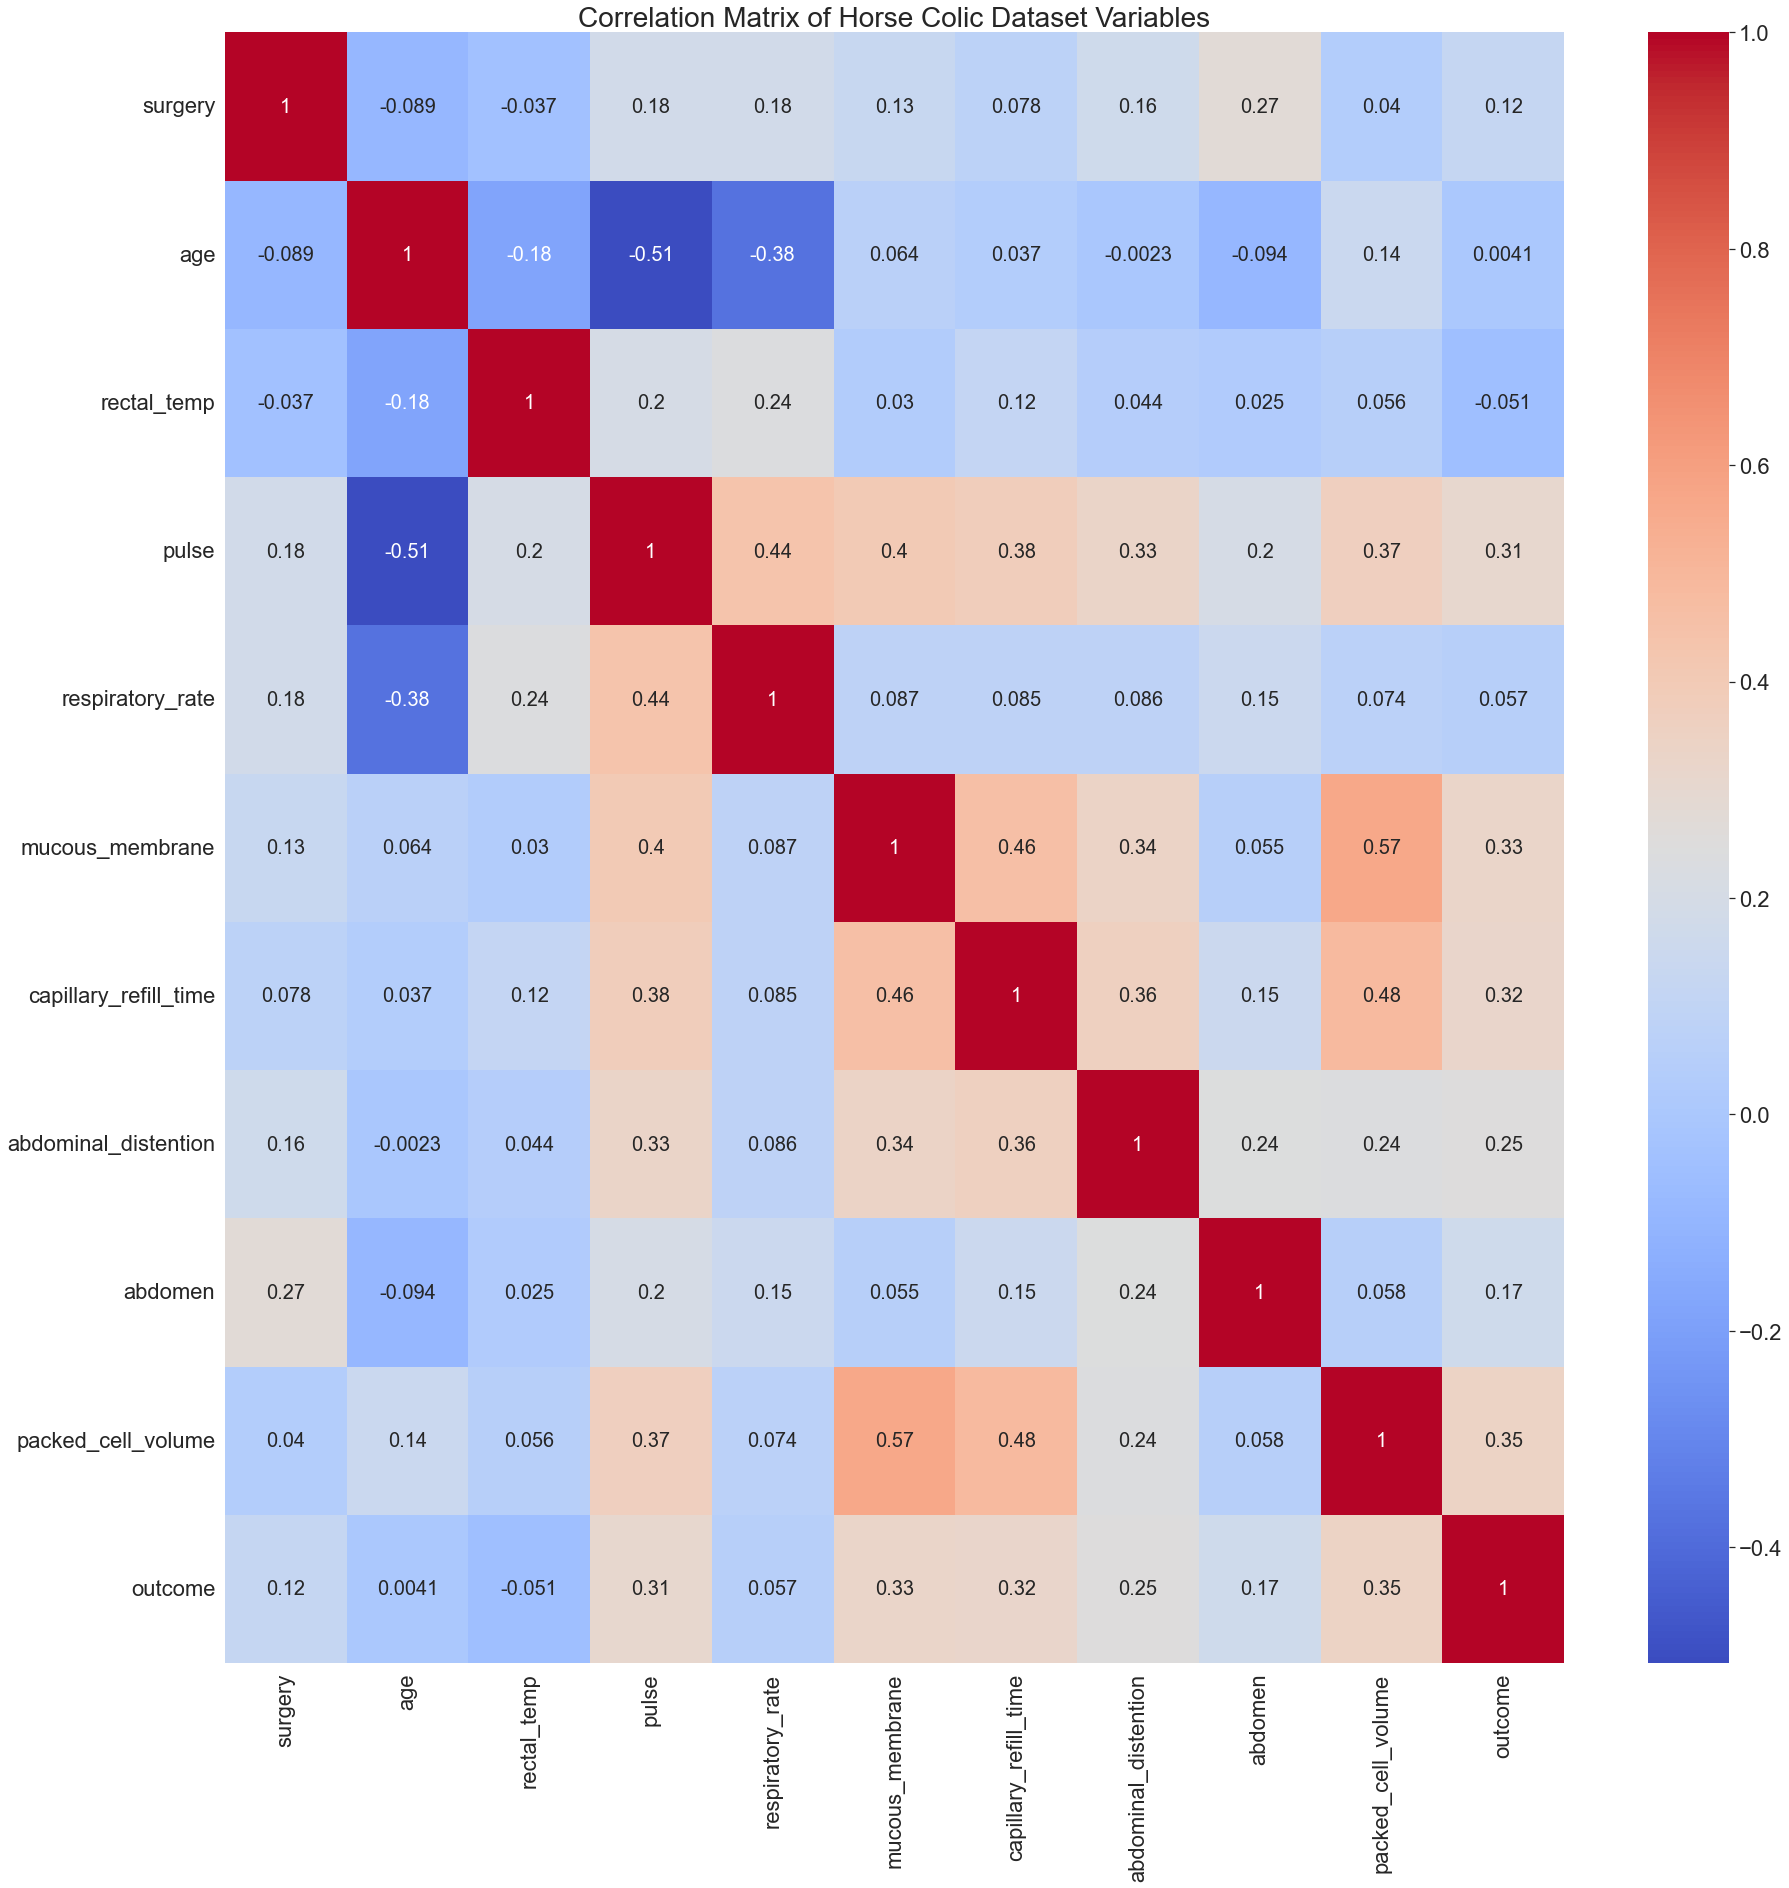

In [51]:
## Complete a correlation heatmpa to assess all variables.

corr = horse_df.corr()

## Plot the heatmap.
color = plt.get_cmap('coolwarm') 
sns.set(font_scale=2.0)
plt.figure(figsize=(30, 30))
corr_matrix = sns.heatmap(horse_df.corr(), annot=True, cmap=color, annot_kws={"size":20})
corr_matrix.set_title("Correlation Matrix of Horse Colic Dataset Variables", fontsize = 28)

Within this correlation heatmap, we can see and ascertain the following:
* The strongest, positive correlation exists between packed_cell_volume and mucous_membrane.
* capillary_refill_time and packed_cell_volume is the second strongest, positive correlation.
* age and pulse are the strongest, negative correlation.
* age and respiratory_rate is a moderately strong, negative correlation.

The calculations for the covariance of the two scatterplot relationships are below.

### Step 9: Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

For my hypothesis testing, I elected to conduct the "Testing a Correlation" hypothesis test - this is primarily because I am interested in the relationships of my variables. For my specific hypothesis, below, I will run this correlation test to determine whether I have support for my hypothesis or not. 

Hypothesis:

I hypothesize that horses of which received surgery for colic were less likely to die or be euthanized than those that did not receive colic surgery. 
   * I hypothesize that the relationship between surgery status and a horse's life outcome is a significant one.

In [52]:
## Testing a correlation.
## Relationship between surgery and outcome.

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    
data = horse_df.surgery.values, horse_df.outcome.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()

In [53]:
ht.actual, ht.MaxTestStat()

(0.11761937718175842, 0.21046043784001014)

In [54]:
pvalue

0.037

The actual correlation for the relationship between surgery option and horse life outcome was a positive, weak relationship, coming in at 0.12 for the corellation coefficient. After 1,000 iterations, this value went up to 0.17 for the correlation coefficient. Overall, we can see that the observed correlation is small and weak.

However, the computed p-value is 0.04 (which is less than 0.05), which indicates that this relationship is statistically significant.

So, while the observed correlation is small, the p-value tells us that there is likely support for my hypothesis - particularly the second part of my hypothesis in which I hypothesize the relationship between these variables is statistically significant. 

### Step 10: For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

For this section, I wanted to consider a few relationships, so I did a couple of extra analyses. 

See each below.

In [55]:
## Complete regression analysis to ascertain which biomarkers may impact outcome.

import statsmodels.formula.api as smf

outcome = horse_df.outcome
surgery = horse_df.surgery
age = horse_df.age
rect_temp = horse_df.rectal_temp
mucuous_memb = horse_df.mucous_membrane
capillary_refill = horse_df.capillary_refill_time
abdomen = horse_df.abdomen
abdo_dist = horse_df.abdominal_distention

Below is a summary of the definitions of the output table characteristics/stats that I will be looking at for the regressions I run. I will not be discussing all of the information, but rather those characteristics that are most important for my project scope and topic. See below:

* The dependent variable is the variable we are looking at to see how it is impacted by the predictor or independent variables.
* Degrees of freedom are an accounting of how many parameters are estimated by the model and, by extension, a measure of complexity for linear regression models.
* The df model indicates the number of predictor variables.
* The covariance type for the below measures is nonrobust - this is a measure of how two variables are linked in a positive or negative way, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the same as nonrobust, of course.
* R-squared is probably the most important measurement here, as it is the measurement of how much of the dependent variable is explained by the changes in our independent variables.
* Adjusted R-squared is important for analyzing multiple dependent variables’ efficacy on the model.
* The F-statistic is comparing your produced linear model for your variables against a model that replaces your variables’ effect to 0, to find out if your group of variables are statistically significant. To interpret this number correctly, using a chosen alpha value and an F-table is necessary. Prob (F-Statistic) uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0.

In [56]:
formula = 'outcome ~ surgery + age'
model = smf.ols(formula, data=horse_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.109
Date:                Sat, 05 Mar 2022   Prob (F-statistic):              0.123
Time:                        10:43:47   Log-Likelihood:                -330.48
No. Observations:                 299   AIC:                             667.0
Df Residuals:                     296   BIC:                             678.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1889      0.346      3.438      0.001       0.508       1.869
surgery        0.1788      0.087      2.052      0.041       0.007       0.350
age            0.0398      0.157      0.254      0.800      -0.269       0.349
==============================================================================
Omnibus:                       38.416   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.982
Skew:                           0.943   Prob(JB):                     6.28e-11
Kurtosis:                       2.534   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the first relationship, I wanted to look at the impact that surgery option plus the accompaniment of age had on a horse's life outcome. From the results above, we can see that (using the model of Ordinary Least Squares):

* The dependent variable is outcome (of course).
* There are 296 degrees of freedom.
* The df model is 2.
* The covariance type is nonrobust.
* R-squared is very low (0.014), which indicates that the model explains only 1.4% of the change in the outcome variable.
* Adjusted R-squared is also not very strong - 0.7%.
* Our F-1 score statistic is 2.109 with its probability being .000123%.

In [57]:
formula = 'capillary_refill ~ pulse'
model = smf.ols(formula, data=horse_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       capillary_refill   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     49.76
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           1.24e-11
Time:                        10:43:47   Log-Likelihood:                -154.49
No. Observations:                 297   AIC:                             313.0
Df Residuals:                     295   BIC:                             320.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8244      0.066     12.401      0.000       0.694       0.955
pulse          0.0061      0.001      7.054      0.000       0.004       0.008
==============================================================================
Omnibus:                       29.468   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.869
Skew:                           0.760   Prob(JB):                     1.20e-07
Kurtosis:                       2.486   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the second relationship, I wanted to look at the relationship between a capillary refill time and pulse. From the results above, we can see that (using the model of Ordinary Least Squares):

* The dependent variable is capillary_refill.
* There are 295 degrees of freedom.
* The df model is 1.
* The covariance type is nonrobust.
* R-squared is somewhat low (0.144), which indicates that the model explains only 14.4% of the change in the outcome variable.
* Adjusted R-squared is similarly strong - 14.1%.
* Our F-1 score statistic is 49.76 with its probability being .00124%.

In [58]:
formula = 'abdomen ~ abdo_dist'
model = smf.ols(formula, data=horse_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                abdomen   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     18.33
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           2.51e-05
Time:                        10:43:47   Log-Likelihood:                -499.34
No. Observations:                 299   AIC:                             1003.
Df Residuals:                     297   BIC:                             1010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6018      0.159     22.623      0.000       3.288       3.915
abdo_dist      0.2961      0.069      4.281      0.000       0.160       0.432
==============================================================================
Omnibus:                       57.462   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.032
Skew:                          -1.290   Prob(JB):                     2.08e-19
Kurtosis:                       3.498   Cond. No.                         5.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For the third relationship, I wanted to look at the relationship between a horse's abdomen status and its abdominal distension. From the results above, we can see that (using the model of Ordinary Least Squares):

* The dependent variable is abdomen.
* There are 297 degrees of freedom.
* The df model is 1.
* The covariance type is nonrobust.
* R-squared is low (0.058), which indicates that the model explains only 5.8% of the change in the outcome variable.
* Adjusted R-squared is also not very strong - 5.5%.
* Our F-1 score statistic is 18.33 with its probability being .00251%.